In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers.merge import concatenate

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow import keras

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import cv2, numpy as np

In [3]:
train_datagen_with_aug = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   zoom_range=[0.2,0.5],
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   validation_split=0.2)

train_generator = train_datagen_with_aug.flow_from_directory(
    r'D:\My Work\Baranidharan Sir Research\cnn_xrays_images',
    target_size=(331, 331),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='training'
    ) # set as training data

validation_generator = train_datagen_with_aug.flow_from_directory(
    r'D:\My Work\Baranidharan Sir Research\cnn_xrays_images', # same directory as training data
    target_size=(331, 331),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
    ) # set as validation data

input_img = Input(shape=(331, 331, 3))

Found 5121 images belonging to 3 classes.
Found 1278 images belonging to 3 classes.


In [4]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(331,331,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

In [5]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 81, 81, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 81, 81, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 40, 40, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 384)       8

In [6]:
graph = model.fit(train_generator, epochs=25, validation_data=validation_generator)
graph

Epoch 1/25
161/161 [==============================] - 720s 4s/step - loss: 1.7080 - accuracy: 0.4987 - val_loss: 1.7611 - val_accuracy: 0.3905
Epoch 2/25
161/161 [==============================] - 683s 4s/step - loss: 1.2573 - accuracy: 0.5786 - val_loss: 1.9620 - val_accuracy: 0.4014
Epoch 3/25
161/161 [==============================] - 690s 4s/step - loss: 1.1234 - accuracy: 0.5954 - val_loss: 0.9424 - val_accuracy: 0.5814
Epoch 4/25
161/161 [==============================] - 689s 4s/step - loss: 1.0363 - accuracy: 0.6093 - val_loss: 0.9036 - val_accuracy: 0.5884
Epoch 5/25
161/161 [==============================] - 687s 4s/step - loss: 1.0096 - accuracy: 0.6151 - val_loss: 0.9656 - val_accuracy: 0.5743
Epoch 6/25
161/161 [==============================] - 685s 4s/step - loss: 0.9516 - accuracy: 0.6280 - val_loss: 1.2824 - val_accuracy: 0.4366
Epoch 7/25
161/161 [==============================] - 686s 4s/step - loss: 0.9002 - accuracy: 0.6389 - val_loss: 1.3490 - val_accuracy: 0.4022

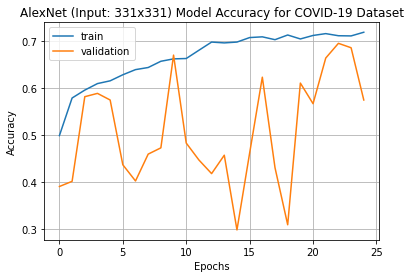

In [7]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.title('AlexNet (Input: 331x331) Model Accuracy for COVID-19 Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])

plt.show()

In [9]:
max_acc = max(graph.history['val_accuracy'])

print('The highest accuracy achieved using Alexnet Model with input 331x331 is',max_acc*100)

The highest accuracy achieved using Alexnet Model with input 331x331 is 69.48356628417969
